# PySimPace: Structural MRI Simulation Tutorial

This notebook demonstrates how to use PySimPace to simulate **motion artifacts** and **image artifacts** in structural MRI (3D volumes).

We will show:

✅ Simulating motion in image space  
✅ Simulating motion in k-space (basic)  
✅ Simulating motion with blended k-space segments (realistic)  
✅ Applying additional artifacts:
- Ghosting
- Gibbs ringing

✅ Visualizing the results

---


In [1]:
import os
from pysimpace.io import load_nifti, save_nifti
from pysimpace.simulation.structural import simulate_structural_motion
from pysimpace.simulation.models import generate_random_affine_transforms
import matplotlib.pyplot as plt

In [6]:
# Path to a clean structural MRI (T2, T1, etc.)
clean_path = os.path.join("clean", "POCEMR001_FLAIR.nii.gz")

# Load data
structural_data, affine, header = load_nifti(clean_path)
print("Structural MRI shape:", structural_data.shape)

Structural MRI shape: (224, 224, 160)


In [9]:
structural_transforms = generate_random_affine_transforms(
    num_transforms=5,
    max_rot_deg=5.0,
    max_trans_mm=5.0,
    vol_shape=structural_data.shape
)

In [10]:
#simulation
corrupted_structural = simulate_structural_motion(
    structural_data,
    transforms=structural_transforms,
    use_blended=True,
    num_segments=8,
    ghosting=True,
    apply_gibbs=True,
    gibbs_strength=0.05,
    seed=42
)

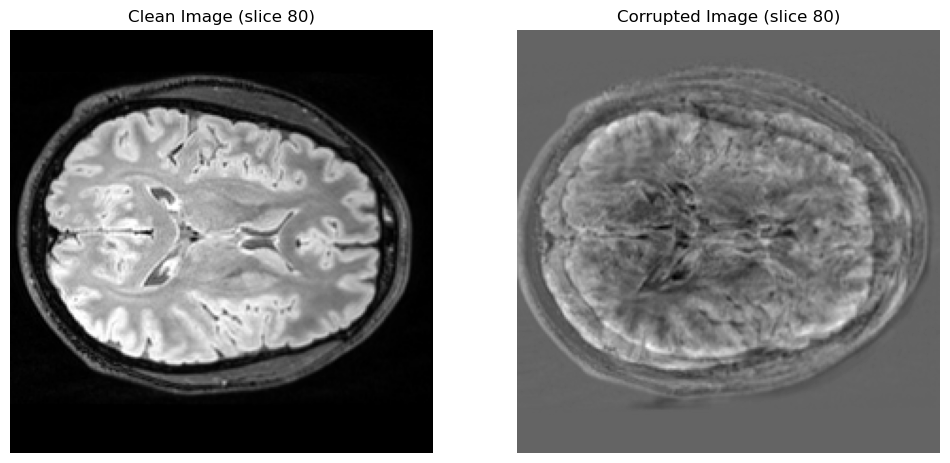

In [11]:
slice_idx = structural_data.shape[-1] // 2

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(structural_data[:,:,slice_idx], cmap='gray')
plt.title("Clean Image (slice {})".format(slice_idx))
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(corrupted_structural[:,:,slice_idx], cmap='gray')
plt.title("Corrupted Image (slice {})".format(slice_idx))
plt.axis('off')

plt.show()